<a href="https://colab.research.google.com/github/kanishk16/routetoMIDASS/blob/master/CV_Problem/CV_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Making the essential Imports and Mounting the Google Drive**



In [1]:
# Mount the drive for saving directly to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import PIL
print(PIL.PILLOW_VERSION)
# we need pillow version of 5.3.0
# we will uninstall the older version first
!pip uninstall -y Pillow
# install the new one
!pip install Pillow==4.1.1
# import the new one
import PIL
print(PIL.PILLOW_VERSION)

4.1.1
Uninstalling Pillow-4.1.1:
  Successfully uninstalled Pillow-4.1.1
    100% |████████████████████████████████| 5.7MB 6.8MB/s 
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
fastai 1.0.51 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.


4.1.1


In [0]:
# Imports 
import numpy as np
import torch
import pickle
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

### Defining datapath(s) n preprocessing the data from the .pkl files

In [0]:
data_dir = '/content/'
train_lab_dir = data_dir + 'train_label.pkl'
train_dir = data_dir + 'train_image.pkl'
test_dir = data_dir + 'test_image.pkl'

In [7]:
# load images from pkl file

with open(train_dir,"rb") as f:
  train_data = pickle.load(f)
print(type(train_data))
print(len(train_data[0]))
print(len(train_data))

<class 'list'>
784
8000


In [6]:
# load images from pkl file

with open(test_dir,"rb") as f:
  test_data = pickle.load(f)
print(type(test_data))
print(len(test_data[0]))
print(len(test_data))

<class 'list'>
784
2000


In [8]:
with open(train_lab_dir,"rb") as f:
  train_lab = pickle.load(f)
  print(train_lab)
print(type(train_lab))
print(len(train_lab))
print(set(train_lab))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#### Probably these are a set of grey-scale images (28x28x1) but the possibility of CMYK (14x14x4) cannot be ruled out completely..

### Visualizing the Images!!

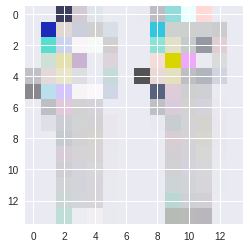

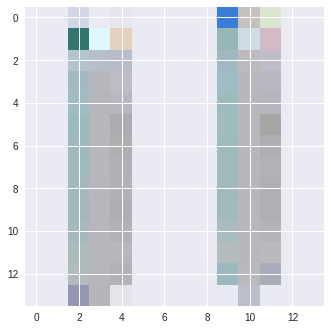

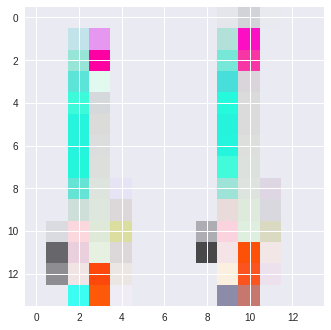

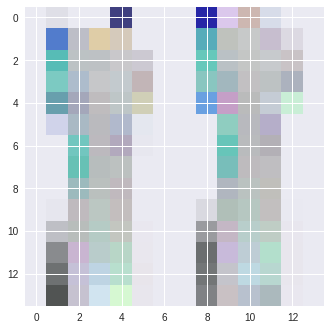

In [0]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10,4))
for ii in range(4):
  vtrain_data = np.array(train_data[ii]).reshape(14,14,4)
  plt.imshow(vtrain_data)
  plt.show()

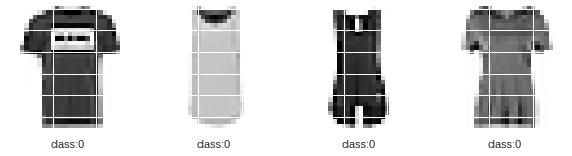

In [0]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
  vtrain_data = np.array(train_data[ii]).reshape(28,28)
  ax = axes[ii]
  ax.imshow(vtrain_data)
  ax.set_xticklabels('')
  ax.set_yticklabels('')
  ax.set_xlabel("class:" + str(train_lab[ii]))
  #plt.show()

####Convert data from type < LIST > to < NDARRAY>

In [9]:
# train_data (C, H, W)
#itrain_data = np.array(train_data,np.float32).reshape((len(train_data),28,28)) 
itrain_data = np.array(train_data).reshape((len(train_data),1,28,28)) 
print(itrain_data.shape)
print(itrain_data.dtype)

vtrain_lab = np.array(train_lab)
# Changing labels as per PyTorch input
vtrain_lab[vtrain_lab == 2] = 1
vtrain_lab[vtrain_lab == 3] = 2
vtrain_lab[vtrain_lab == 6] = 3

#print(itrain_lab.reshape(-1))
print(vtrain_lab)

(8000, 1, 28, 28)
int64
[0 0 0 ... 3 3 3]


(28, 28)
(28, 28)
(28, 28)
(28, 28)


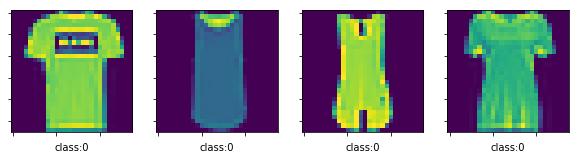

In [10]:
#Confirmimg NO CHANGES while RESHAPING
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
  vtrain_data = itrain_data[ii,:,:].reshape(28,28)
  print(vtrain_data.shape)
  ax = axes[ii]
  ax.imshow(vtrain_data)
  ax.set_xticklabels('')
  ax.set_yticklabels('')
  ax.set_xlabel("class:" + str(vtrain_lab[ii]))
  #plt.show()

#### Splitting the TRAINING SET into TRAIN and VALIDATION

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(itrain_data/255, vtrain_lab, test_size=0.20, shuffle=True)

In [12]:
# check the current shape
print(x_train.dtype)
print(x_train.shape)
#x_train.reshape((-1,1))
#print(x_train.shape)

float64
(6400, 1, 28, 28)


### DATA AUGMENTATION 

>Applied only for the training dataset to Normalize the images as well as to avoid Overfitting

>Though the basic transforms are defined for both train_set and test_set to bring uniformity to all the images

In [0]:
# Define transforms for the training and validation sets
train_transforms =  transforms.Compose([transforms.ToPILImage(),
                                       #transforms.RandomRotation(30),
                                       #transforms.RandomResizedCrop(224),
                                       transforms.Resize(224),
                                       #transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5,),(0.5,)) ])


In [0]:
valid_transforms =  transforms.Compose([transforms.ToPILImage(),
                              transforms.Resize(224),
                              #transforms.CenterCrop(224),
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,),(0.5,))])


### < ndarray > ------> <torch.Tensor> ------> dataset and dataloaders

In [0]:
train_x = torch.stack([train_transforms(torch.Tensor(i)) for i in x_train]) 
train_y = torch.stack([torch.Tensor(i) for i in y_train.reshape(-1,1)])

train_dataset = torch.utils.data.TensorDataset(train_x,train_y)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

> **Sanity check of trainloader**

In [19]:
dataiter = iter(trainloader)
t, b = dataiter.next()
print(type(b))
print(t.shape)
print(b.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 224, 224])
torch.Size([64, 1])


In [0]:
valid_x = torch.stack([valid_transforms(torch.Tensor(i)) for i in x_valid]) 
valid_y = torch.stack([torch.Tensor(i) for i in y_valid.reshape(-1,1)])

valid_dataset = torch.utils.data.TensorDataset(valid_x,valid_y)
validloader = torch.utils.data.DataLoader(valid_dataset, batch_size = 64, shuffle=True)

> **Sanity check of validloader**

In [21]:
dataiter = iter(validloader)
t, b = dataiter.next()
print(type(b))
print(t.shape)
print(b.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 224, 224])
torch.Size([64, 1])


### -------------TRAINING --------------

> 1.Create your own MnistResNet model by **adjusting the ResNet-18** for the MNIST  
>2.Tweak the original in order to** take single channel image **and set the number of classes to be predicted as 4  


In [0]:
from torchvision.models.resnet import ResNet, BasicBlock

class MnistResNet(ResNet):
    def __init__(self):
        super(MnistResNet, self).__init__(BasicBlock, [2, 2, 2, 2], num_classes=4)
        self.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        
    def forward(self, x):
        return torch.softmax(super(MnistResNet, self).forward(x), dim=-1)

>3. Create its object as model

In [0]:
model = MnistResNet()

In [24]:
# print the model for sanity check
model

MnistResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2

>4. Move tensors to GPU if CUDA available 
>5. Define Criterion and Optimizer


In [25]:
# Enabling CUDA
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

criterion = nn.CrossEntropyLoss()
# experimenting with adadelta as it doesn't require those magical num
optimizer = optim.Adadelta(model.parameters())

#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

model.to(device)


MnistResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2

>6. Train the Model 

>7. Save the model as soon as the Validation Loss decreases

In [26]:
n_epochs = 30
steps = 0

valid_loss_min = np.inf

train_losses, valid_losses = [], []

# keep track of training and validation loss
train_loss = 0.0

for epoch in range(1, n_epochs+1):
    
    running_loss = 0
    model.train()
    
    for images, labels in trainloader:
        #scheduler.step()
        images, labels = images.to(device), labels.to(device).long().reshape(-1)
        
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass 
        log_ps = model(images)
        # calculate batch loss
        loss = criterion(log_ps, labels)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # update parameters
        optimizer.step()
        
        running_loss += loss.item()
        #train_loss += loss.item()*images.size(0)
        
        ## Implement the validation pass and print out the validation accuracy
    else:
      accuracy = 0
      v_loss = 0
        
      with torch.no_grad():
        model.eval()
        for images, labels in validloader:
          images, labels = images.to(device), labels.to(device).long().reshape(-1)
          log_ps = model(images)
          #loss = criterion(log_ps, labels)
          #v_loss += loss.item()*images.size(0)
          v_loss += criterion(log_ps, labels)
          
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)
          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))  

      # calculate average losses
      train_loss = running_loss/len(trainloader)
      valid_loss = v_loss/len(validloader)

      train_losses.append(train_loss)
      valid_losses.append(valid_loss)

      # print training/validation statistics 
      print('Epoch: {}\{} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tValidation Accuracy: {:.3f}'.format(epoch, n_epochs, train_loss, valid_loss, accuracy/len(validloader)))

      # save model if validation loss has decreased
      if valid_loss <= valid_loss_min:
          print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
          torch.save(model.state_dict(), '/content/gdrive/My Drive/Colab Notebooks/Image_Classifier Models/midass11.pt')
          valid_loss_min = valid_loss


       

Epoch: 1\30 	Training Loss: 1.049732 	Validation Loss: 1.022444 	Validation Accuracy: 0.712
Validation loss decreased (inf --> 1.022444).  Saving model ...
Epoch: 2\30 	Training Loss: 0.970343 	Validation Loss: 0.996274 	Validation Accuracy: 0.744
Validation loss decreased (1.022444 --> 0.996274).  Saving model ...
Epoch: 3\30 	Training Loss: 0.950566 	Validation Loss: 1.370413 	Validation Accuracy: 0.361
Epoch: 4\30 	Training Loss: 0.939299 	Validation Loss: 0.978333 	Validation Accuracy: 0.762
Validation loss decreased (0.996274 --> 0.978333).  Saving model ...
Epoch: 5\30 	Training Loss: 0.922089 	Validation Loss: 0.954365 	Validation Accuracy: 0.790
Validation loss decreased (0.978333 --> 0.954365).  Saving model ...
Epoch: 6\30 	Training Loss: 0.919603 	Validation Loss: 0.973909 	Validation Accuracy: 0.762
Epoch: 7\30 	Training Loss: 0.910312 	Validation Loss: 0.985982 	Validation Accuracy: 0.752
Epoch: 8\30 	Training Loss: 0.898326 	Validation Loss: 0.942465 	Validation Accuracy:

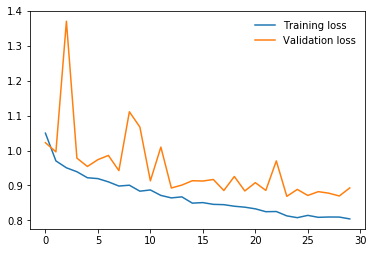

In [27]:
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)

### TESTING

In [0]:
# load the model (best out of all experiments) 
model.load_state_dict(torch.load('/content/gdrive/My Drive/Colab Notebooks/Image_Classifier Models/midass10.pt'))

In [0]:
# load test images from pkl file

with open(test_dir,"rb") as f:
  test_data = pickle.load(f)
  
print(type(test_data))
print(len(test_data[0]))
print(len(test_data))

<class 'list'>
784
2000


In [28]:
#test_data <list> to numpy array(C, H, W)
itest_data = np.array(test_data).reshape((len(test_data),1,28,28))
print(type(itest_data))
print(itest_data[0])

<class 'numpy.ndarray'>
[[[  0   0   0   0   0   0   0   0   0  52 192 115  27   1   1  31 143
   179  32   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   5 113 185 216 190 229 237 220 217 242 201
   191 222 167  87   0   0   0   0   0   0   0]
  [  0   0   0   0   0  50 175 194 189 186 185 187 199 188 184 193 185
   188 183 187 193 210  15   0   0   0   0   0]
  [  0   0   0   0   0 199 194 181 188 190 189 188 192 199 197 195 192
   191 188 184 177 189 178   0   0   0   0   0]
  [  0   0   0   0  48 194 189 189 193 189 189 188 188 191 191 190 193
   190 188 186 194 184 189  42   0   0   0   0]
  [  0   0   0   0 194 228 196 190 189 191 177 177 181 187 186 184 180
   181 188 192 188 187 191 126   0   0   0   0]
  [  0   0   0   0 219 238 205 190 190 179 192 220 209 224 231 220 227
   206 184 189 188 196 186 190   0   0   0   0]
  [  0   0   0  66 235 225 202 188 190 221 214 189 161 169 191 176 207
   194 239 191 185 196 184 178  47   0   0   0]
  [  0   0   0 131 243 2

In [0]:
# convert into torch.tensor
test_x = torch.stack([valid_transforms(torch.Tensor(i)) for i in itest_data/255]) 

# define testdata and testloader
test_dataset = torch.utils.data.TensorDataset(test_x)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size = 500)

In [0]:
print(type(test_x))

<class 'torch.Tensor'>


In [0]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Uncomment if only TESTING
#model.to(device)

labels = np.array([],np.int32)

with torch.no_grad():
  # model in evaluation mode
  model.eval()
  for [images] in testloader:
    
    images = images.to(device)
    log_ps = model(images)
    
    # probabilities  and labels for topk classes of test images 
    ps = torch.exp(log_ps)
    top_p, top_class = ps.topk(1, dim=1)
    
    # convert labels to <cpu> <numpy ndarray> type and store them into a numpy.ndarray
    label = top_class.cpu().numpy()
    labels = np.append(labels, label)


>** Sanity Check of  LABELS**

In [31]:
print(labels.dtype)
print(type(labels))
print(labels)

int64
<class 'numpy.ndarray'>
[0 0 0 ... 3 3 3]


>**Converting the LABELS back to 0,2,3,6 from 0,1,2,3 respectively**

In [0]:
labels[labels == 3] = 6
labels[labels == 2] = 3
labels[labels == 1] = 2


In [33]:
# sanity check
print(set(labels))

{0, 2, 3, 6}


In [34]:
labels

array([0, 0, 0, ..., 6, 6, 6])

>**Convert into Dataframe for final check before binding in csv**

In [36]:
import pandas as pd

df = pd.DataFrame({'image_index': list(np.arange(len(labels))) ,'class': labels})
df.head()
df.tail()

,class,image_index
1995,2,1995
1996,6,1996
1997,6,1997
1998,6,1998
1999,6,1999


In [0]:
df.to_csv('Kanishk_Kalra_final.csv', index=False)